[[0 1 0 0 0 0]
 [1 0 0 0 0 0]
 [3 1 1 2 0 0]
 [0 0 0 1 0 0]
 [1 0 0 1 1 0]
 [0 1 0 0 1 0]]
Accuracy Score:  0.2
              precision    recall  f1-score   support

     kunci_C       0.00      0.00      0.00         1
    kunci_am       0.00      0.00      0.00         1
    kunci_dm       1.00      0.14      0.25         7
    kunci_em       0.25      1.00      0.40         1
     kunci_f       0.50      0.33      0.40         3
     kunci_g       0.00      0.00      0.00         2

    accuracy                           0.20        15
   macro avg       0.29      0.25      0.18        15
weighted avg       0.58      0.20      0.22        15



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:

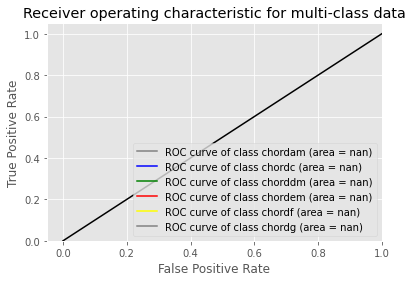

In [45]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# dataframe = pandas.read_csv("datasetbaru.csv", header=None)
dataframe = pandas.read_csv("awalDATASET.csv")
dataset = dataframe.values
X = dataset[:,0:1000].astype(float) # X diambil dari seluruh baris, kolom 2 s.d kolom 1500-1
y = dataset[:,1000] # Y diambil dari seluruh baris, kolom 1

# membagi dataset menjadi data training dan data testing
# data training sebesar 80%, data testing sebesar 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
, random_state=0)

#-----------
# create model 

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
clf = model.fit(X_train, y_train)
#------------

y_pred = model.predict(X_test)
# Use score method to get accuracy of the model
#score_te = model.score(X_test, y_test)
#print('Accuracy Score: ', score_te)

cm = confusion_matrix(y_test, y_pred)
print (cm)

# Use accuracy_score to get accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score: ', acc)

print(classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
y_score = model.predict_proba(X_test)
from sklearn.preprocessing import label_binarize

classes = ['chordam', 'chordc', 'chorddm', 'chordem', 'chordf','chordg']
# Binarize the output
y_test = label_binarize(y_test, classes=classes)
n_classes = y_test.shape[1]
from matplotlib import pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
plt.style.use('ggplot')

# Plotting and estimation of FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
 fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
 roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['gray', 'blue', 'green', 'red', 'yellow'])
for i, color in zip(range(n_classes), colors):
 plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()
